In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage

### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [23]:
dfVehicle = pd.read_csv("Vehicle.csv")
# Random 10 rows from dataframe
print("The dataframe has %d rows" %dfVehicle.shape[0])
print("The dataframe has %d columns" %dfVehicle.shape[1])
dfVehicle.sample(5)
dfVehicle.dropna(inplace = True)

The dataframe has 846 rows
The dataframe has 19 columns


### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

  Labels  class
0    car    429
1    bus    218
2    van    199


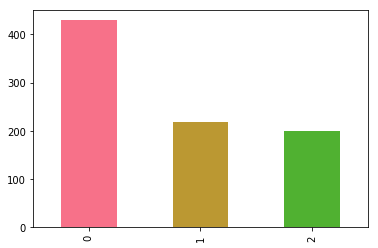

In [10]:
source_counts =pd.DataFrame(dfVehicle["class"].value_counts()).reset_index()
source_counts.columns =["Labels","class"]
print(source_counts)
source_counts["class"].plot(kind='bar')

### Check for any missing values in the data 

In [24]:
# Total missing values for each feature
print(dfVehicle.isnull().sum())

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64


### 3. Standardize the data 

In [99]:
numeric_cols = dfVehicle.select_dtypes(include=[np.number]).columns
dfStd = dfVehicle[numeric_cols].apply(zscore)
dfStd.sample(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
806,-0.687452,0.032037,-0.002729,-0.419661,-0.724754,-0.128151,-0.440488,0.257876,-0.606014,0.076453,-0.268973,-0.464612,-0.131596,-0.455036,-0.681472,-1.422141,-0.159204,-0.369125
788,2.593753,1.171568,1.138435,1.009135,0.028249,0.299721,1.465032,-1.280865,1.338300,1.180227,1.304228,1.476443,1.230116,-0.053505,1.555006,-0.973784,-0.159204,0.171837
666,1.013913,-0.293543,0.884843,0.830535,0.153750,0.299721,0.497149,-0.639723,0.560575,-0.406448,0.437362,0.425990,-1.090983,-0.990411,0.335109,-0.077070,0.979026,1.118521
561,-0.687452,-0.944703,0.377659,0.741235,0.906753,-0.128151,-0.017039,-0.126809,-0.217151,-1.027321,0.341044,-0.127782,-0.719608,0.214183,-0.681472,1.043823,-0.484413,-0.504366
623,1.500018,1.171568,1.645620,1.128201,0.279250,0.727593,1.586018,-1.280865,1.727163,1.387184,1.304228,1.544951,0.796844,0.080339,3.181535,2.837252,0.166004,1.253762
109,0.649335,0.520408,-0.192923,0.890068,0.781252,-0.556023,0.497149,-0.767951,0.560575,0.352396,0.437362,0.488789,-0.100648,0.214183,-0.274839,-0.525427,0.979026,-0.098644
184,1.135439,0.194828,1.518823,1.187734,0.530251,0.299721,1.041583,-1.024408,0.949438,0.076453,0.918954,0.991179,1.106324,-0.321192,0.538425,-0.301249,0.328609,0.442318
323,0.527809,1.008778,0.884843,1.009135,0.530251,0.299721,0.587888,-0.767951,0.560575,0.628340,0.597893,0.540170,1.756232,-0.588880,0.741741,-1.310052,0.328609,0.442318
797,2.107648,1.334359,1.645620,1.247267,-0.097251,0.513657,1.162569,-1.152637,0.949438,1.318198,0.918954,1.128195,1.292012,-1.124255,2.978219,-1.197963,1.141631,1.253762
459,0.527809,-0.456333,0.504455,0.681702,-0.097251,0.085785,0.285424,-0.511494,0.171712,-0.268476,0.019982,0.237593,-1.121931,-1.525787,-0.681472,-0.525427,1.629444,1.659484


Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

### K - Means Clustering

### 4. Assign a dummy array called distortion

In [143]:
distortions = []

You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

In [145]:
cdist(dfStd,kmeanModel.cluster_centers_,'euclidean')

array([[ 4.09779822,  4.63821638,  2.21937994, ..., 11.98292164,
         7.28701194,  3.46838573],
       [ 2.32503719,  6.0227724 ,  2.95585653, ..., 13.34197746,
         8.4761305 ,  2.61198725],
       [ 7.10641994,  1.57212726,  3.72614755, ..., 12.71194348,
         4.48328576,  6.08959349],
       ...,
       [ 8.0452164 ,  2.8453053 ,  4.69361699, ..., 12.79814022,
         4.53649642,  6.85977802],
       [ 3.07069032,  8.25524507,  4.93229958, ..., 14.23262654,
        10.23489342,  2.76965702],
       [ 3.68500561,  9.42860615,  6.13734467, ..., 14.68159768,
        11.04051302,  4.40331484]])

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [144]:
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(dfStd)
    kmeanModel.fit(dfStd)
    distortions.append(
        sum(np.min(cdist(dfStd, kmeanModel.cluster_centers_, 'euclidean'), axis=1))**2 / dfStd.shape[0])

### 6. Plotting Elbow/ Scree Plot

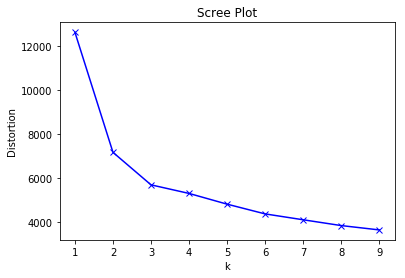

In [146]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Scree Plot')
plt.show()

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

### Find out the optimal value of K

In [45]:
# Build kmeans clustering model using k=3
kmeans = KMeans(n_clusters=3)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [147]:
kmeans.cluster_centers_

array([[-0.91987072, -0.52009251, -0.89320752, -1.06435572, -0.50042171,
        -0.2190738 , -0.7791213 ,  0.86589322, -0.74535635, -0.484632  ,
        -0.78240328, -0.78341064, -0.38498232,  0.83878747, -0.09524349,
        -0.30171562, -1.05420601, -1.11069466],
       [ 1.13076532,  1.17094237,  1.19500584,  1.01909505,  0.21505188,
         0.34250798,  1.27180461, -1.19061224,  1.27548416,  1.09266768,
         1.22038121,  1.28132727,  1.07954232, -0.02879497,  0.16229031,
         0.26566456, -0.00535553,  0.18380067],
       [-0.2339617 , -0.57387481, -0.30776905, -0.03041322,  0.2050726 ,
        -0.11653151, -0.45904181,  0.32506329, -0.48798836, -0.53604446,
        -0.41380935, -0.46366305, -0.60155031, -0.61924057, -0.06177969,
         0.01066762,  0.81278556,  0.69897299]])

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [77]:
dfCntr = pd.DataFrame(data = kmeans.cluster_centers_, columns=dfStd.columns)
dfCntr.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.919871,-0.520093,-0.893208,-1.064356,-0.500422,-0.219074,-0.779121,0.865893,-0.745356,-0.484632,-0.782403,-0.783411,-0.384982,0.838787,-0.095243,-0.301716,-1.054206,-1.110695
1,1.130765,1.170942,1.195006,1.019095,0.215052,0.342508,1.271805,-1.190612,1.275484,1.092668,1.220381,1.281327,1.079542,-0.028795,0.162290,0.265665,-0.005356,0.183801
2,-0.233962,-0.573875,-0.307769,-0.030413,0.205073,-0.116532,-0.459042,0.325063,-0.487988,-0.536044,-0.413809,-0.463663,-0.601550,-0.619241,-0.061780,0.010668,0.812786,0.698973


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [79]:
kmeans.labels_

array([2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 0, 0, 2, 2, 1,
       2, 0, 1, 1, 0, 2, 2, 2, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0,
       0, 2, 0, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 2, 0, 1, 2, 1, 1,
       2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 1, 2, 0, 2, 0, 1, 2, 1, 2, 0, 1,
       0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 2, 2, 0, 0, 0, 2, 1, 1, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 1, 0, 2, 0, 2, 2, 1,
       0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 0, 2, 0, 1, 2, 2, 1, 1,
       2, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 2, 2, 2, 1,
       2, 1, 2, 1, 2, 0, 1, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 0, 1, 2, 2, 2,
       1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 1, 2, 0, 2,
       1, 0, 2, 2, 0, 1, 0, 0, 2, 2, 1, 0, 1, 0, 2, 2, 1, 2, 2, 1, 1, 0,
       2, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 1, 2, 0, 0, 1, 2, 2, 0, 0, 1, 0,
       2, 1, 0, 2, 1, 2, 2, 1, 2, 1, 0, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1,
       1, 0, 2, 1, 0, 0, 0, 2, 0, 1, 1, 0, 1, 2, 0,

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [112]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

In [124]:
X = np.concatenate([a, b, c])

### 9. Combine all three arrays a,b,c into a dataframe

In [134]:
X = pd.DataFrame(data=X)
type(X)

pandas.core.frame.DataFrame

### 10. Use scatter matrix to print all the 3 distributions

(250, 2)


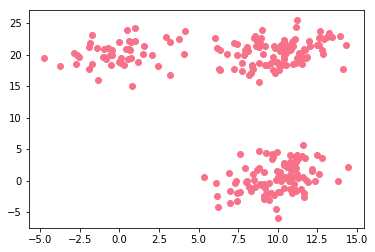

In [135]:
np.random.seed(101)
print(X.shape)
plt.scatter(X.iloc[:,0], X.iloc[:,1])
plt.show()

### 11. Find out the linkage matrix

Use ward as linkage metric and distance as Eucledian

In [136]:
# generate the linkage matrix
Z = linkage(X, 'ward', metric='euclidean')
Z

array([[1.72000000e+02, 1.80000000e+02, 4.82710336e-03, 2.00000000e+00],
       [1.69000000e+02, 2.09000000e+02, 2.43987840e-02, 2.00000000e+00],
       [1.02000000e+02, 1.19000000e+02, 7.01190338e-02, 2.00000000e+00],
       [1.75000000e+02, 2.12000000e+02, 7.85846121e-02, 2.00000000e+00],
       [1.98000000e+02, 2.28000000e+02, 7.89416604e-02, 2.00000000e+00],
       [1.17000000e+02, 1.22000000e+02, 8.56893653e-02, 2.00000000e+00],
       [5.80000000e+01, 9.10000000e+01, 8.80590787e-02, 2.00000000e+00],
       [2.17000000e+02, 2.27000000e+02, 9.00972259e-02, 2.00000000e+00],
       [1.64000000e+02, 1.73000000e+02, 9.33691135e-02, 2.00000000e+00],
       [1.87000000e+02, 2.40000000e+02, 1.12652996e-01, 2.00000000e+00],
       [2.80000000e+01, 9.50000000e+01, 1.18574318e-01, 2.00000000e+00],
       [1.06000000e+02, 1.30000000e+02, 1.32776041e-01, 2.00000000e+00],
       [1.13000000e+02, 2.52000000e+02, 1.45023164e-01, 3.00000000e+00],
       [1.57000000e+02, 2.33000000e+02, 1.47267464e

### 12. Plot the dendrogram for the consolidated dataframe

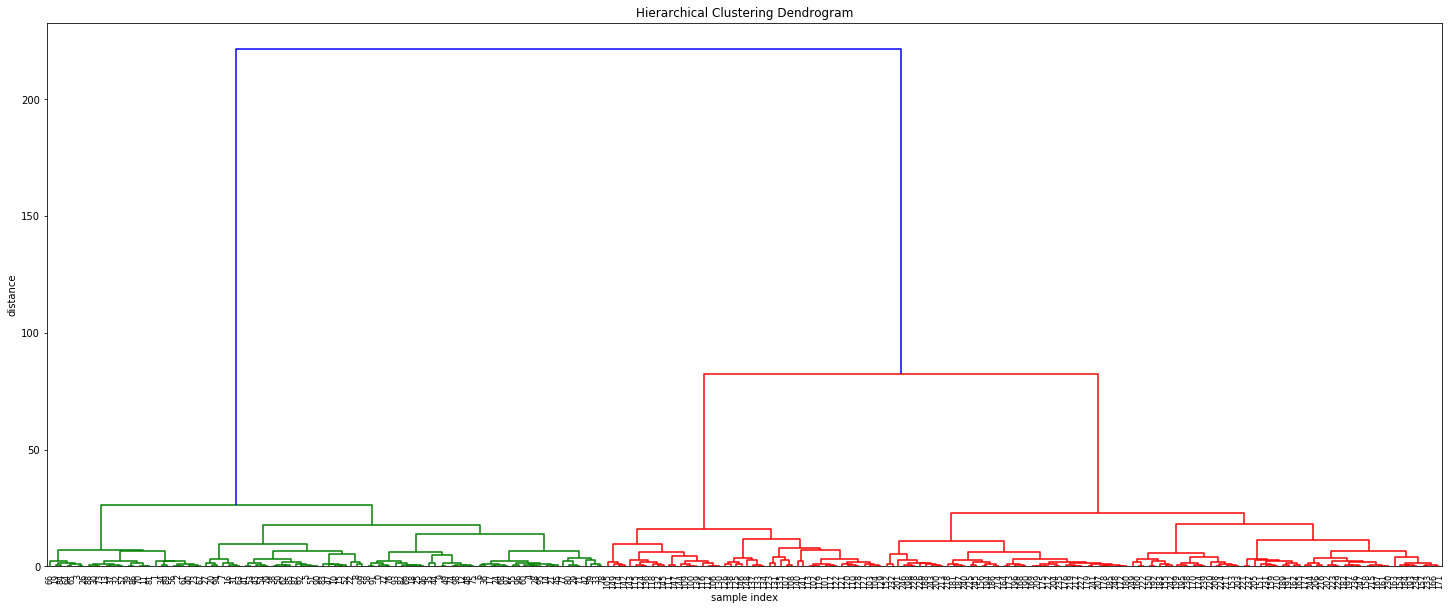

In [137]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

### 13. Recreate the dendrogram for last 12 merged clusters 

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

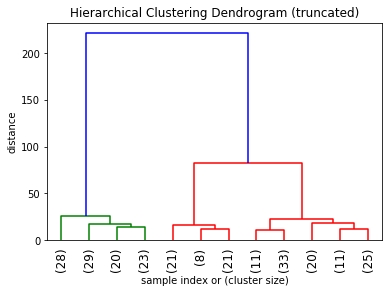

In [138]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
)
plt.show()

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

In [106]:
from scipy.cluster.hierarchy import fcluster
max_d = 80

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [139]:
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

### Use matplotlib to visually observe the clusters in 2D space 

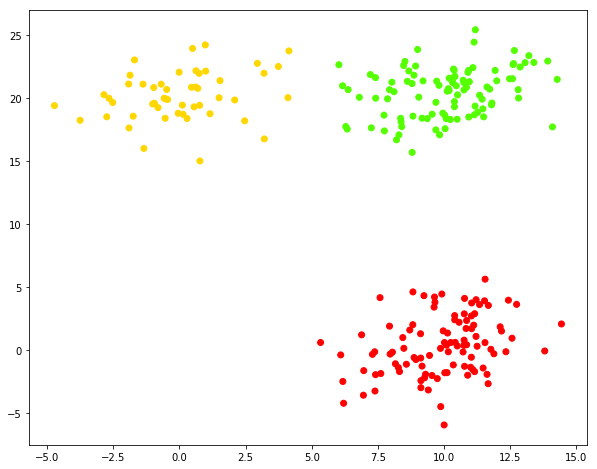

In [142]:
plt.figure(figsize=(10, 8))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()